## Generating populations of neurons with deterministic connections
* https://nest-simulator.readthedocs.io/en/latest/tutorials/pynest_tutorial/part_2_populations_of_neurons.html#pynest-tutorial-2

In [1]:
import nest
import matplotlib.pyplot as plt
%matplotlib inline
pop1 = nest.Create("iaf_psc_alpha", 10000)
pop1.set({"I_e": 376.0})
pop2 = nest.Create("iaf_psc_alpha", 10)
multimeters = nest.Create("multimeter", 10)
multimeters.set({"record_from":["V_m"]})


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0
 Built: Aug 27 2024 04:33:06

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
# nest.Connect(pop1, pop2, syn_spec={"weight":20.0}) # default connection type is all_to_all
nest.Connect(pop1, pop2, "all_to_all", syn_spec={"weight":20.0, "delay":1.0})
nest.Connect(multimeters, pop2, "one_to_one")


In [3]:
nest.Simulate(1000.0)


Oct 01 14:53:55 NodeManager::prepare_nodes [Info]: 
    Preparing 10020 nodes for simulation.

Oct 01 14:53:55 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 10020
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Not using MPI

Oct 01 14:53:56 SimulationManager::run [Info]: 
    Simulation finished.


In [4]:
dmm = multimeters.get()
vm = dmm['events'][0]["V_m"]
ts = dmm['events'][0]["times"]

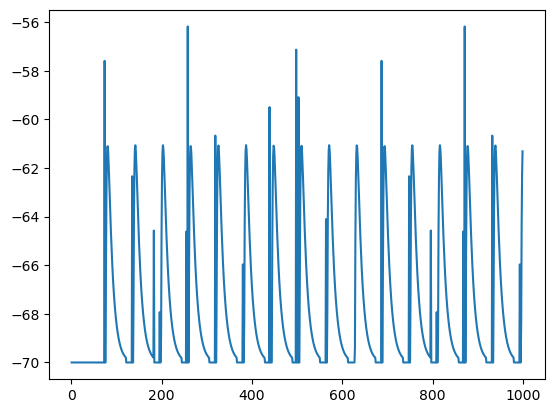

In [5]:
plt.plot(ts, vm)

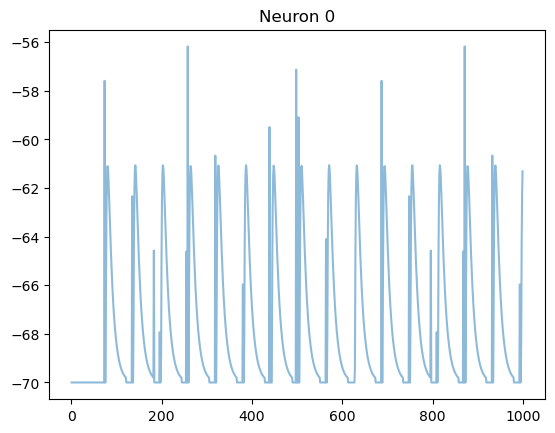

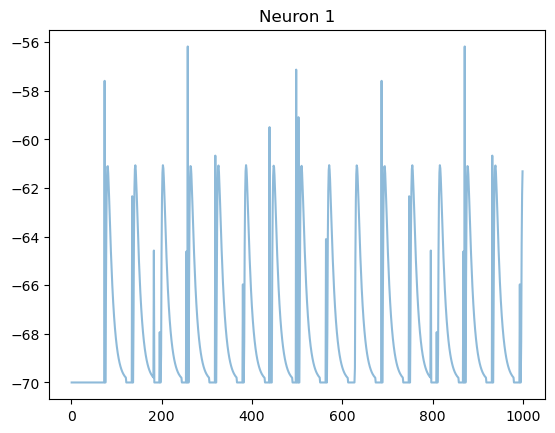

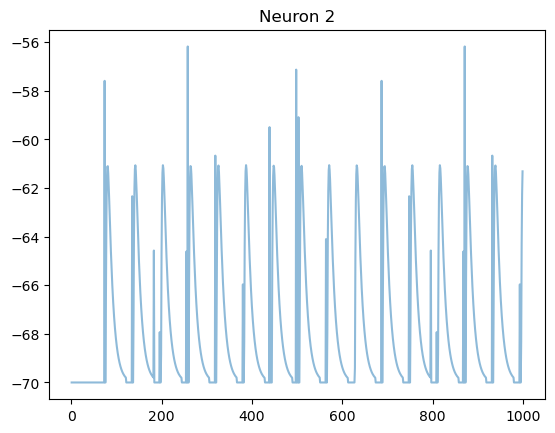

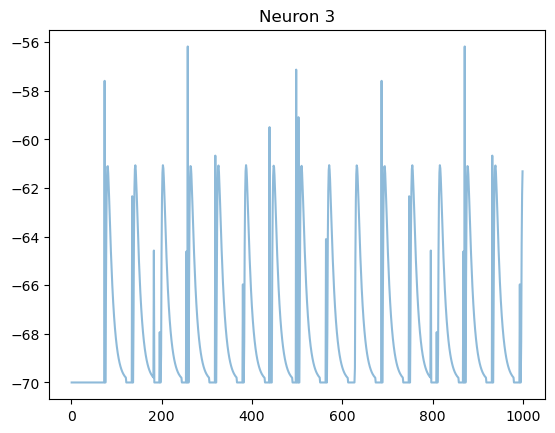

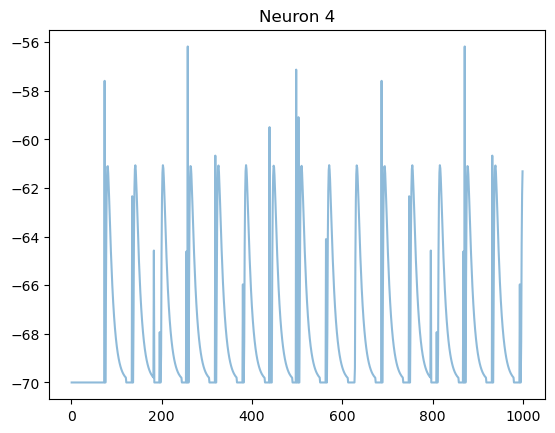

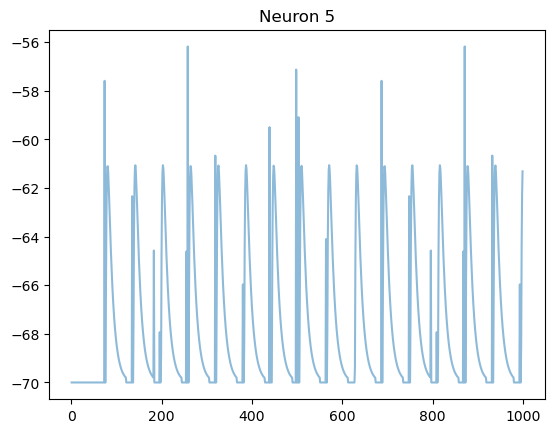

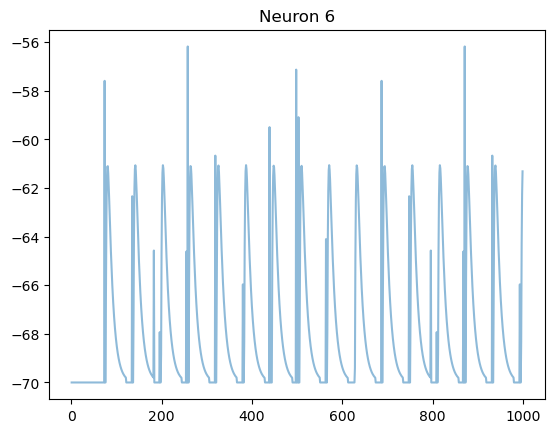

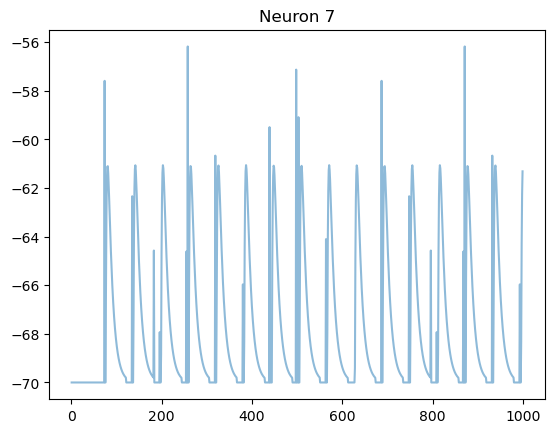

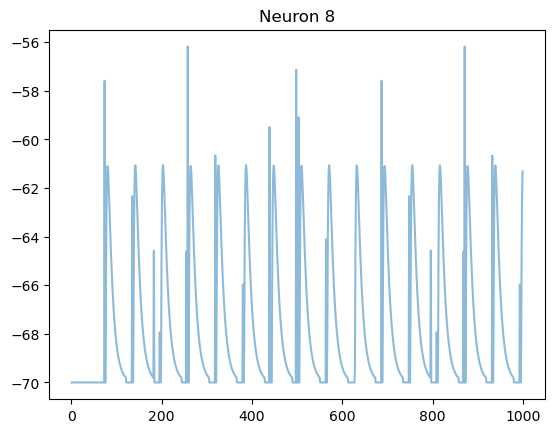

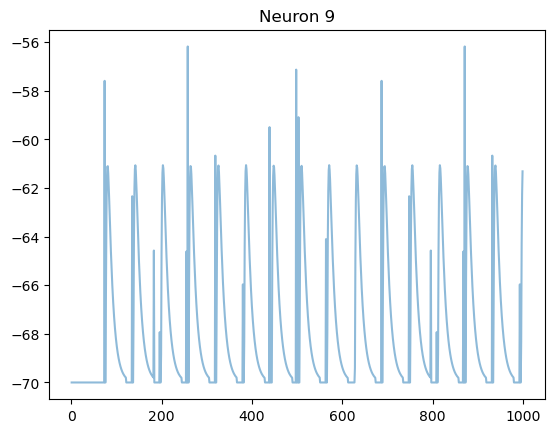

In [6]:
for i in range(10):
    vm = dmm['events'][i]["V_m"]
    ts = dmm['events'][i]["times"]
    plt.figure(i)
    plt.plot(ts, vm, alpha=0.5)
    plt.title(f"Neuron {i}")